In [1]:
import os
import numpy as np
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from natsort import natsorted


PROJ_DIR = '/mnt/labdata/got_project/'


In [2]:

def column_corr(matrix1, matrix2):
    """
    Compute Pearson correlation coefficients between corresponding columns of two matrices.
    
    Parameters:
    matrix1 (numpy.ndarray): First matrix of shape (m, n)
    matrix2 (numpy.ndarray): Second matrix of shape (m, n)
    
    Returns:
    numpy.ndarray: 1D array of correlation coefficients for each column pair.
    """
    if matrix1.shape != matrix2.shape:
        raise ValueError("Both matrices must have the same shape.")
    
    num_cols = matrix1.shape[1]
    correlations = []
    
    for i in range(num_cols):
        col1, col2 = matrix1[:, i], matrix2[:, i]
        
        # Check if either column is constant
        if np.all(col1 == col1[0]) or np.all(col2 == col2[0]):
            correlations.append(np.nan)  # Undefined correlation
        else:
            correlations.append(pearsonr(col1, col2)[0])
    
    return np.array(correlations)


def corr_distplot(corr_vector, ):
    fig, ax = plt.subplots(figsize=(6, 6))
    sns.histplot(corr_vector, ax=ax)
    ax.set_xlabel('pearsonr', fontsize=14)
    # ax.set_xlim(0, 1)
    ax.set_ylabel('n_features', fontsize=14)
    return fig, ax


In [3]:
my_features = os.path.join(PROJ_DIR, 'ian/data/alexnet/Daisy_all_clips.npy')

daisy_features = os.path.join(PROJ_DIR, 'daisy/Game_of_Thrones/visual_features.npy')

rebecca_features_dir = os.path.join(PROJ_DIR, 'ian/data/alexnet/Rebecca_v2/conv5_Features')
rebecca_features_list = natsorted(os.listdir(rebecca_features_dir))
# print(rebecca_features_list)
feats_list = []
for fn in rebecca_features_list:
    k = np.load(os.path.join(rebecca_features_dir, fn))
    feats_list.append(k)
rebecca_feats = np.array(feats_list)


In [4]:
daisy_feats = np.load(daisy_features)
my_feats = np.load(my_features)

# print(np.testing.assert_almost_equal(daisy_feats, my_feats))

print(daisy_feats.shape)
print(rebecca_feats.shape)
print(my_feats.shape)

(195, 43264)
(195, 43264)
(195, 43264)


Minimum correlation: 0.8283814191818237
Maximum correlation: 0.9958735108375549


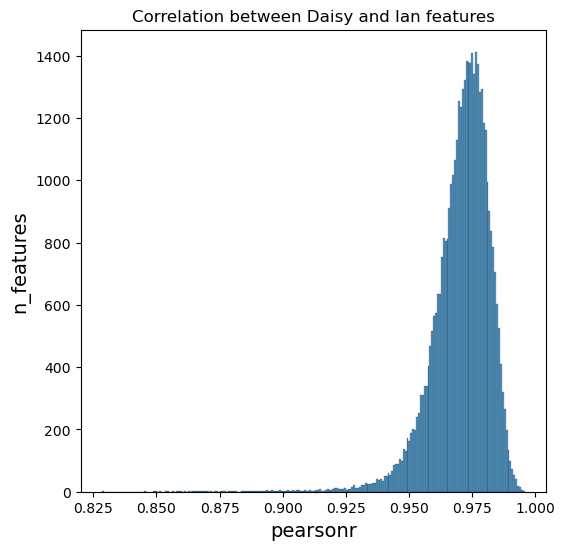

In [5]:
corrs_daisy = column_corr(daisy_feats, my_feats)
# print(corrs_daisy)
print(f'Minimum correlation: {np.min(corrs_daisy)}')
print(f'Maximum correlation: {np.max(corrs_daisy)}')
fig, ax = corr_distplot(corrs_daisy)
ax.set_title('Correlation between Daisy and Ian features')
plt.show()

Minimum correlation: 0.8759031295776367
Maximum correlation: 0.9971611499786377


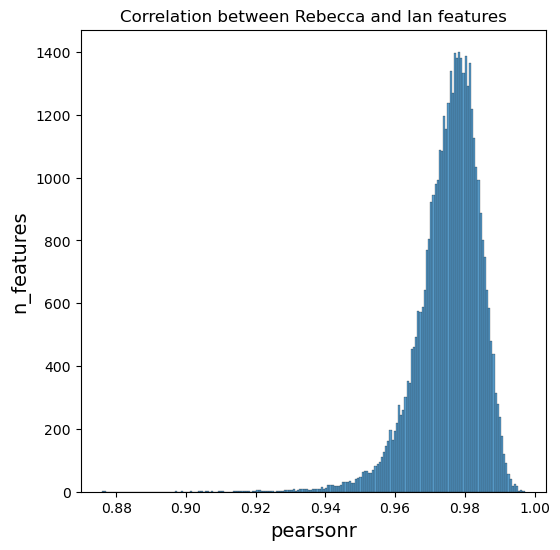

In [6]:
corrs_rebecca = column_corr(rebecca_feats, my_feats)
# print(corrs_rebecca)
print(f'Minimum correlation: {np.min(corrs_rebecca)}')
print(f'Maximum correlation: {np.max(corrs_rebecca)}')
fig, ax = corr_distplot(corrs_rebecca)
ax.set_title('Correlation between Rebecca and Ian features')
plt.show()

Minimum correlation: 0.8234933018684387
Maximum correlation: 0.9958040118217468


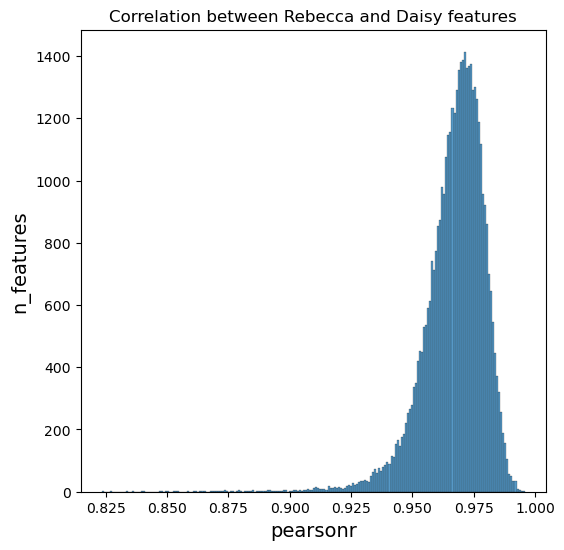

In [7]:
corrs_rebecca_daisy = column_corr(rebecca_feats, daisy_feats)
# print(corrs_rebecca_daisy)
print(f'Minimum correlation: {np.min(corrs_rebecca_daisy)}')
print(f'Maximum correlation: {np.max(corrs_rebecca_daisy)}')
fig, ax = corr_distplot(corrs_rebecca_daisy)
ax.set_title('Correlation between Rebecca and Daisy features')
plt.show()

In [8]:

pca = PCA(n_components=.7, random_state=0)
my_components = pca.fit_transform(my_feats)


daisy_pca = os.path.join(PROJ_DIR, 'daisy/Game_of_Thrones/visual_features_pca.npy')
daisy_components = np.load(daisy_pca)

rebecca_pca = os.path.join(PROJ_DIR, 'ian/data/alexnet/Rebecca_v2/PCA_Features_Revised/all_pca_features.npy')
rebecca_components = np.load(rebecca_pca)


print(f'Daisy components array shape: {daisy_components.shape}')
print(f'Rebecca components array shape: {rebecca_components.shape}')
print(f'Ian components array shape: {my_components.shape}')


Daisy components array shape: (195, 46)
Rebecca components array shape: (195, 46)
Ian components array shape: (195, 47)


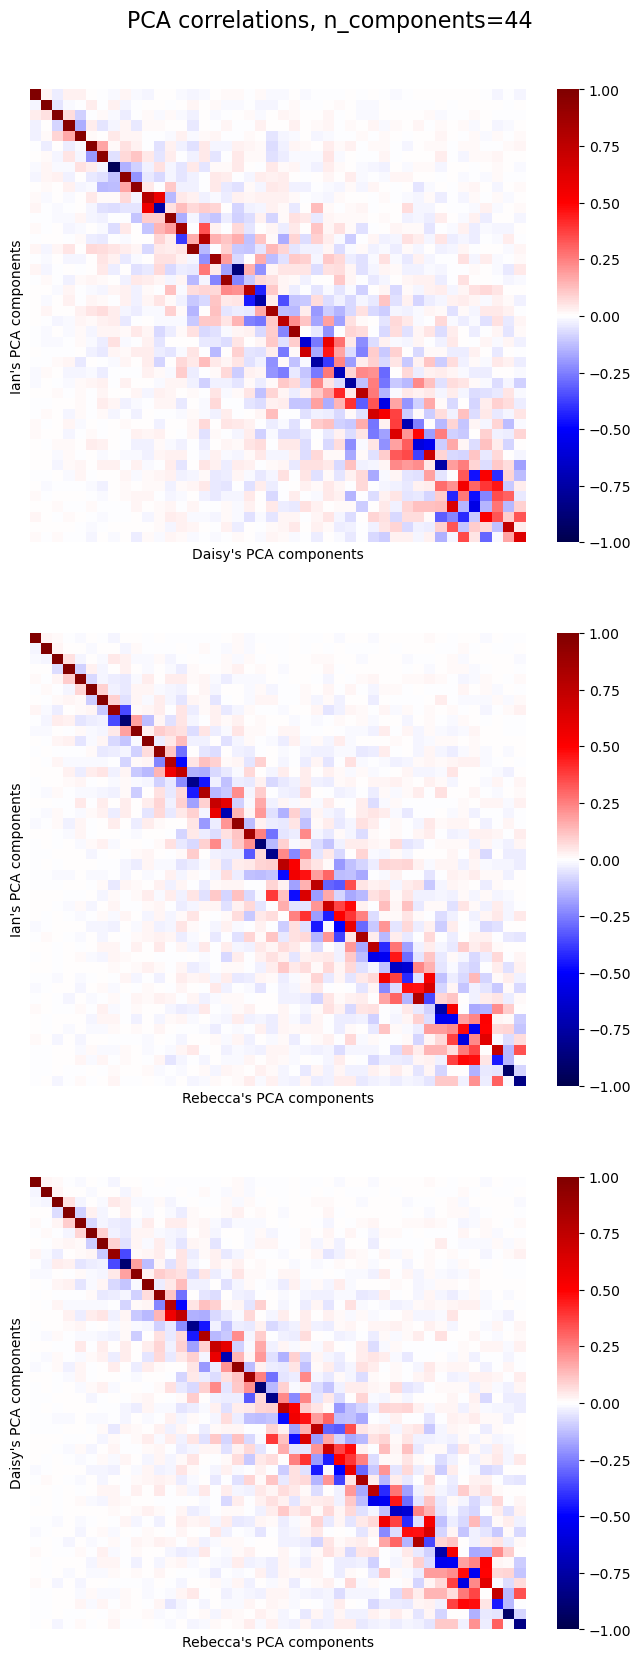

In [9]:
n_comps = 44

fig, axs = plt.subplots(nrows=3, figsize=(8, 20))
fig.suptitle(f'PCA correlations, n_components={n_comps}', fontsize=16, y=0.92)

pca_corrs_daisy = np.corrcoef(daisy_components[:, :n_comps].T, my_components[:, :n_comps].T)[:n_comps, n_comps:]
sns.heatmap(pca_corrs_daisy, cmap='seismic', vmin=-1, vmax=1, ax=axs[0])
axs[0].set_xlabel("Daisy's PCA components")
axs[0].set_ylabel("Ian's PCA components")

pca_corrs_rebecca = np.corrcoef(rebecca_components[:, :n_comps].T, my_components[:, :n_comps].T)[:n_comps, n_comps:]
sns.heatmap(pca_corrs_rebecca, cmap='seismic', vmin=-1, vmax=1, ax=axs[1])
axs[1].set_xlabel("Rebecca's PCA components")
axs[1].set_ylabel("Ian's PCA components")

pca_corrs_rebecca_daisy = np.corrcoef(rebecca_components[:, :n_comps].T, daisy_components[:, :n_comps].T)[:n_comps, n_comps:]
sns.heatmap(pca_corrs_rebecca, cmap='seismic', vmin=-1, vmax=1, ax=axs[2])
axs[2].set_xlabel("Rebecca's PCA components")
axs[2].set_ylabel("Daisy's PCA components")

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

